In [21]:
#! pip install --user opencv-python
#! pip install --user matplotlib
# !pip install --user seaborn
# some dependencies might need to be installed

In [5]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import time as t
from sklearn.preprocessing import normalize

In [6]:
IMAGE_PATH = './208.jpg'
image = cv2.imread(IMAGE_PATH)

In [7]:
def print_image(image):
    cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()

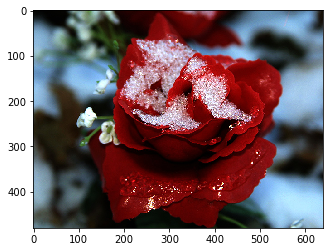

In [8]:
print_image(image)

## Ke Contrast
The constrast is based on the calculation of the aggregated RGB histogram of the image.

In [9]:
channels = cv2.split(image)
colors = ('r', 'g', 'b')

In [32]:
histogram = [0.0]
for (channel, color) in zip(channels, colors):
    histogram += cv2.calcHist([channel], [0], None, [256], [0, 256])

normalized_histogram = normalize(histogram, norm='l1', axis=0, copy=True, return_norm=False)

Then the width of 98% mass is calculated

In [33]:
def middleMassWidth(percentage, histogram):
    bias = (int)((1 - percentage)/2)
    accumulator = 0.0
    start = 0
    for index, bin_value in enumerate(histogram):
        accumulator = accumulator + bin_value
        if(accumulator < bias):
            start = index
        if(accumulator > bias + percentage):
            return index - start - 1

In [34]:
middleMassWidth(0.98, normalized_histogram)

243

In [35]:
middleMassWidth(0.95, normalized_histogram)

220

# Ke brightness
The mean brightness may be calculated as the mean of the value channel of the HSV representation of the image.

In [38]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv_image)

In [77]:
print(v)

[[ 20  16  13 ...,  25  22  18]
 [ 19  16  13 ...,  22  20  18]
 [ 19  15  12 ...,  20  19  19]
 ..., 
 [147 145 143 ..., 222 223 224]
 [147 148 148 ..., 220 221 221]
 [147 151 152 ..., 217 217 218]]


The value channel ranges from 0 to 255. So, to get the brightness average percentage of the image we can use.

In [48]:
np.mean(v) / 256 * 100

45.488103230794266

# Hue Count

In [91]:
hue_countable = []
for rows in hsv_image:
    for cols in rows:
        if cols[2]/256 > 0.15 and cols[2]/256 < 0.95 and cols[1]/256 > 0.2:
            hue_countable.append(cols[0])


In [92]:
print(len(hue_countable))

208675


In [93]:
hue_count_histogram = np.histogram(hue_countable, bins=20)

In [94]:
print(hue_count_histogram)

(array([84006,  4069,  3010,   825,  1440,  2499,  1011,  1189,  1860,
        2913, 10355, 60903,  2174,   312,   285,   315,   308,   957,
        3451, 26793], dtype=int64), array([   0.  ,    8.95,   17.9 ,   26.85,   35.8 ,   44.75,   53.7 ,
         62.65,   71.6 ,   80.55,   89.5 ,   98.45,  107.4 ,  116.35,
        125.3 ,  134.25,  143.2 ,  152.15,  161.1 ,  170.05,  179.  ]))


In [98]:
m = np.max(hue_count_histogram[0])
alpha = 0.05

In [99]:
N = 0
for bin in hue_count_histogram[0]:
    if bin > alpha * m:
        N = N + 1
print(N)

4


In [102]:
qh = 20 - N
print(qh)

16


# Spacial distribution of edges